### Compare HSFP data to NPM data

#### Combine astrocyte HSFP data
- 3 session of astrocyte-iAChSnFR behavior + HSFP data
- Combine rewarded and unrewarded trials from all sessions

In [1]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import h5py
import json

In [2]:
reward_473_F1 = []
reward_473_F2 = []
reward_514_F1 = []
reward_514_F2 = []
unreward_473_F1 = []
unreward_473_F2 = []
unreward_514_F1 = []
unreward_514_F2 = []

# Load each of the seesions
f = h5py.File('C:\AIND\output_data\BigTiffs2023-08-14T12_19_41.8326656-07_00\data_behaviorHSFP.hdf5','r')
time = np.array(f['Time'])
wavelength = np.array(f['wavelength'])
rw_473_F1 = np.array(f['rw_473_F1'])
rw_473_F2 = np.array(f['rw_473_F2'])
rw_514_F1 = np.array(f['rw_514_F1'])
rw_514_F2 = np.array(f['rw_514_F2'])
unrw_473_F1 = np.array(f['unrw_473_F1'])
unrw_473_F2 = np.array(f['unrw_473_F2'])
unrw_514_F1 = np.array(f['unrw_514_F1'])
unrw_514_F2 = np.array(f['unrw_514_F2'])
f.close()
reward_473_F1.append(rw_473_F1)
reward_473_F2.append(rw_473_F2)
reward_514_F1.append(rw_514_F1)
reward_514_F2.append(rw_514_F2)
unreward_473_F1.append(unrw_473_F1)
unreward_473_F2.append(unrw_473_F2)
unreward_514_F1.append(unrw_514_F1)
unreward_514_F2.append(unrw_514_F2)

f = h5py.File('C:\AIND\output_data\BigTiffs2023-08-15T10_48_31.1975424-07_00\data_behaviorHSFP.hdf5','r')
time = np.array(f['Time'])
wavelength = np.array(f['wavelength'])
rw_473_F1 = np.array(f['rw_473_F1'])
rw_473_F2 = np.array(f['rw_473_F2'])
rw_514_F1 = np.array(f['rw_514_F1'])
rw_514_F2 = np.array(f['rw_514_F2'])
unrw_473_F1 = np.array(f['unrw_473_F1'])
unrw_473_F2 = np.array(f['unrw_473_F2'])
unrw_514_F1 = np.array(f['unrw_514_F1'])
unrw_514_F2 = np.array(f['unrw_514_F2'])
f.close()
reward_473_F1.append(rw_473_F1)
reward_473_F2.append(rw_473_F2)
reward_514_F1.append(rw_514_F1)
reward_514_F2.append(rw_514_F2)
unreward_473_F1.append(unrw_473_F1)
unreward_473_F2.append(unrw_473_F2)
unreward_514_F1.append(unrw_514_F1)
unreward_514_F2.append(unrw_514_F2)

f = h5py.File('C:\AIND\output_data\BigTiffs2023-08-16T10_00_41.6919680-07_00\data_behaviorHSFP.hdf5','r')
time = np.array(f['Time'])
wavelength = np.array(f['wavelength'])
rw_473_F1 = np.array(f['rw_473_F1'])
rw_473_F2 = np.array(f['rw_473_F2'])
rw_514_F1 = np.array(f['rw_514_F1'])
rw_514_F2 = np.array(f['rw_514_F2'])
unrw_473_F1 = np.array(f['unrw_473_F1'])
unrw_473_F2 = np.array(f['unrw_473_F2'])
unrw_514_F1 = np.array(f['unrw_514_F1'])
unrw_514_F2 = np.array(f['unrw_514_F2'])
f.close()
reward_473_F1.append(rw_473_F1)
reward_473_F2.append(rw_473_F2)
reward_514_F1.append(rw_514_F1)
reward_514_F2.append(rw_514_F2)
unreward_473_F1.append(unrw_473_F1)
unreward_473_F2.append(unrw_473_F2)
unreward_514_F1.append(unrw_514_F1)
unreward_514_F2.append(unrw_514_F2)

# Concatenate the rewarded and unrewarded trials from each session
Re_473_F1 = np.concatenate(reward_473_F1)
Re_473_F2 = np.concatenate(reward_473_F2)
Re_514_F1 = np.concatenate(reward_514_F1)
Re_514_F2 = np.concatenate(reward_514_F2)
UnRe_473_F1 = np.concatenate(unreward_473_F1)
UnRe_473_F2 = np.concatenate(unreward_473_F2)
UnRe_514_F1 = np.concatenate(unreward_514_F1)
UnRe_514_F2 = np.concatenate(unreward_514_F2)


In [31]:
# Get 500 trials from rewarded and unrewarded trials

# create a random number generator to get 500 numbers without replacement
rng = np.random.default_rng()
Re_random = rng.choice(Re_473_F1.shape[0], 500, replace=False)
UnRe_random = rng.choice(UnRe_473_F1.shape[0], 500, replace=False)

# Take the 500 trials from wavelength range
wavelength_start = np.where(wavelength == 525)[0][0]
wavelength_end = np.where(wavelength == 535)[0][0]
nRe_473_F1_500 = np.sum(Re_473_F1[Re_random,:,wavelength_start:wavelength_end],axis=2)/(wavelength_end-wavelength_start)
nRe_473_F2_500 = np.sum(Re_473_F2[Re_random,:,wavelength_start:wavelength_end],axis=2)/(wavelength_end-wavelength_start)
nUnRe_473_F1_500 = np.sum(UnRe_473_F1[UnRe_random,:,wavelength_start:wavelength_end],axis=2)/(wavelength_end-wavelength_start)
nUnRe_473_F2_500 = np.sum(UnRe_473_F2[UnRe_random,:,wavelength_start:wavelength_end],axis=2)/(wavelength_end-wavelength_start)

wavelength_start = np.where(wavelength == 535)[0][0]
wavelength_end = np.where(wavelength == 545)[0][0]
nRe_514_F1_500 = np.sum(Re_514_F1[Re_random,:,wavelength_start:wavelength_end],axis=2)/(wavelength_end-wavelength_start)
nRe_514_F2_500 = np.sum(Re_514_F2[Re_random,:,wavelength_start:wavelength_end],axis=2)/(wavelength_end-wavelength_start)
nUnRe_514_F1_500 = np.sum(UnRe_514_F1[UnRe_random,:,wavelength_start:wavelength_end],axis=2)/(wavelength_end-wavelength_start)
nUnRe_514_F2_500 = np.sum(UnRe_514_F2[UnRe_random,:,wavelength_start:wavelength_end],axis=2)/(wavelength_end-wavelength_start)

# Normalize the data with the first 7 seconds of the trial
#normtime_start = np.where(time == -7.5)[0][0]
#normtime_end = np.where(time == -2.5)[0][0]
#nRe_473_F1_500 = (Re_473_F1_500/np.mean(Re_473_F1_500[:,normtime_start:normtime_end],axis=1)[:,None]-1)*100
#nRe_473_F2_500 = (Re_473_F2_500/np.mean(Re_473_F2_500[:,normtime_start:normtime_end],axis=1)[:,None]-1)*100
#nRe_514_F1_500 = (Re_514_F1_500/np.mean(Re_514_F1_500[:,normtime_start:normtime_end],axis=1)[:,None]-1)*100
#nRe_514_F2_500 = (Re_514_F2_500/np.mean(Re_514_F2_500[:,normtime_start:normtime_end],axis=1)[:,None]-1)*100
#nUnRe_473_F1_500 = (UnRe_473_F1_500/np.mean(UnRe_473_F1_500[:,normtime_start:normtime_end],axis=1)[:,None]-1)*100
#nUnRe_473_F2_500 = (UnRe_473_F2_500/np.mean(UnRe_473_F2_500[:,normtime_start:normtime_end],axis=1)[:,None]-1)*100
#nUnRe_514_F1_500 = (UnRe_514_F1_500/np.mean(UnRe_514_F1_500[:,normtime_start:normtime_end],axis=1)[:,None]-1)*100
#nUnRe_514_F2_500 = (UnRe_514_F2_500/np.mean(UnRe_514_F2_500[:,normtime_start:normtime_end],axis=1)[:,None]-1)*100


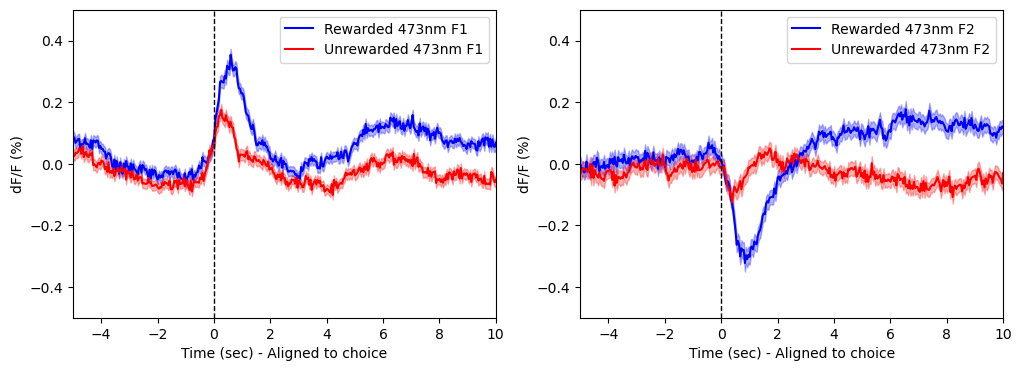

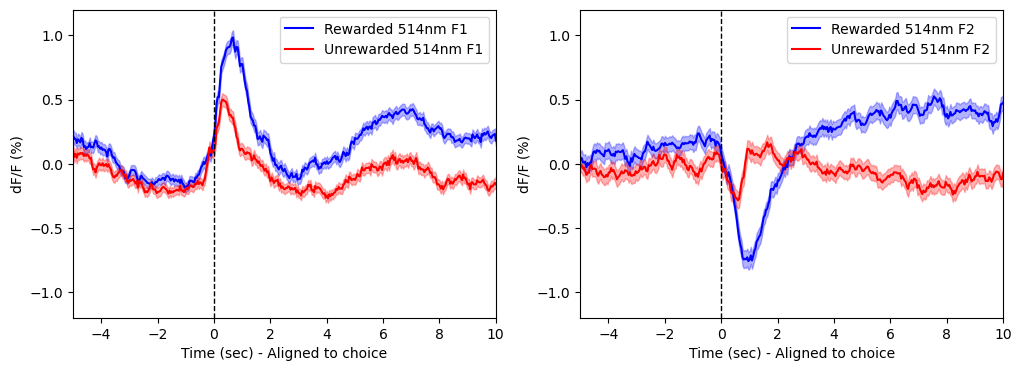

In [32]:
# Create a mean and sem plot for the 500 rewarded and unrewarded trials
Re_473_F1_500_mean = np.mean(nRe_473_F1_500,axis=0)
Re_473_F1_500_sem = np.std(nRe_473_F1_500,axis=0)/np.sqrt(nRe_473_F1_500.shape[0])
Re_473_F2_500_mean = np.mean(nRe_473_F2_500,axis=0)
Re_473_F2_500_sem = np.std(nRe_473_F2_500,axis=0)/np.sqrt(nRe_473_F2_500.shape[0])
Re_514_F1_500_mean = np.mean(nRe_514_F1_500,axis=0)
Re_514_F1_500_sem = np.std(nRe_514_F1_500,axis=0)/np.sqrt(nRe_514_F1_500.shape[0])
Re_514_F2_500_mean = np.mean(nRe_514_F2_500,axis=0)
Re_514_F2_500_sem = np.std(nRe_514_F2_500,axis=0)/np.sqrt(nRe_514_F2_500.shape[0])
UnRe_473_F1_500_mean = np.mean(nUnRe_473_F1_500,axis=0)
UnRe_473_F1_500_sem = np.std(nUnRe_473_F1_500,axis=0)/np.sqrt(nUnRe_473_F1_500.shape[0])
UnRe_473_F2_500_mean = np.mean(nUnRe_473_F2_500,axis=0)
UnRe_473_F2_500_sem = np.std(nUnRe_473_F2_500,axis=0)/np.sqrt(nUnRe_473_F2_500.shape[0])
UnRe_514_F1_500_mean = np.mean(nUnRe_514_F1_500,axis=0)
UnRe_514_F1_500_sem = np.std(nUnRe_514_F1_500,axis=0)/np.sqrt(nUnRe_514_F1_500.shape[0])
UnRe_514_F2_500_mean = np.mean(nUnRe_514_F2_500,axis=0)
UnRe_514_F2_500_sem = np.std(nUnRe_514_F2_500,axis=0)/np.sqrt(nUnRe_514_F2_500.shape[0])

T = time+1.8
A = 0.3
plt.figure(figsize=(12,4))
# Plot the mean and sem for 473 F1
plt.subplot(1,2,1)
plt.plot(T,Re_473_F1_500_mean,color='blue',label='Rewarded 473nm F1')
plt.fill_between(T,Re_473_F1_500_mean-Re_473_F1_500_sem,Re_473_F1_500_mean+Re_473_F1_500_sem,color='blue',alpha=A)
plt.plot(T,UnRe_473_F1_500_mean,color='red',label='Unrewarded 473nm F1')
plt.fill_between(T,UnRe_473_F1_500_mean-UnRe_473_F1_500_sem,UnRe_473_F1_500_mean+UnRe_473_F1_500_sem,color='red',alpha=A)
plt.xlim(-5,10)
plt.xlabel('Time (sec) - Aligned to choice')
plt.ylim(-0.5,0.5)
plt.ylabel('dF/F (%)')
plt.legend()
plt.axvline(x=0,color='black',linestyle='--',linewidth=1)

# Plot the mean and sem for 473 F2
plt.subplot(1,2,2)
plt.plot(T,Re_473_F2_500_mean,color='blue',label='Rewarded 473nm F2')
plt.fill_between(T,Re_473_F2_500_mean-Re_473_F2_500_sem,Re_473_F2_500_mean+Re_473_F2_500_sem,color='blue',alpha=A)
plt.plot(T,UnRe_473_F2_500_mean,color='red',label='Unrewarded 473nm F2')
plt.fill_between(T,UnRe_473_F2_500_mean-UnRe_473_F2_500_sem,UnRe_473_F2_500_mean+UnRe_473_F2_500_sem,color='red',alpha=A)
plt.xlim(-5,10)
plt.xlabel('Time (sec) - Aligned to choice')
plt.ylim(-0.5,0.5)
plt.ylabel('dF/F (%)')
plt.legend()
plt.axvline(x=0,color='black',linestyle='--',linewidth=1)
plt.show()

plt.figure(figsize=(12,4))
# Plot the mean and sem for 514 F1
plt.subplot(1,2,1)
plt.plot(T,Re_514_F1_500_mean,color='blue',label='Rewarded 514nm F1')
plt.fill_between(T,Re_514_F1_500_mean-Re_514_F1_500_sem,Re_514_F1_500_mean+Re_514_F1_500_sem,color='blue',alpha=A)
plt.plot(T,UnRe_514_F1_500_mean,color='red',label='Unrewarded 514nm F1')
plt.fill_between(T,UnRe_514_F1_500_mean-UnRe_514_F1_500_sem,UnRe_514_F1_500_mean+UnRe_514_F1_500_sem,color='red',alpha=A)
plt.xlim(-5,10)
plt.xlabel('Time (sec) - Aligned to choice')
plt.ylim(-1.2,1.2)
plt.ylabel('dF/F (%)')
plt.legend()
plt.axvline(x=0,color='black',linestyle='--',linewidth=1)

# Plot the mean and sem for 514 F2
plt.subplot(1,2,2)
plt.plot(T,Re_514_F2_500_mean,color='blue',label='Rewarded 514nm F2')
plt.fill_between(T,Re_514_F2_500_mean-Re_514_F2_500_sem,Re_514_F2_500_mean+Re_514_F2_500_sem,color='blue',alpha=A)
plt.plot(T,UnRe_514_F2_500_mean,color='red',label='Unrewarded 514nm F2')
plt.fill_between(T,UnRe_514_F2_500_mean-UnRe_514_F2_500_sem,UnRe_514_F2_500_mean+UnRe_514_F2_500_sem,color='red',alpha=A)
plt.xlim(-5,10)
plt.xlabel('Time (sec) - Aligned to choice')
plt.ylim(-1.2,1.2)
plt.ylabel('dF/F (%)')
plt.legend()
plt.axvline(x=0,color='black',linestyle='--',linewidth=1)
plt.show()


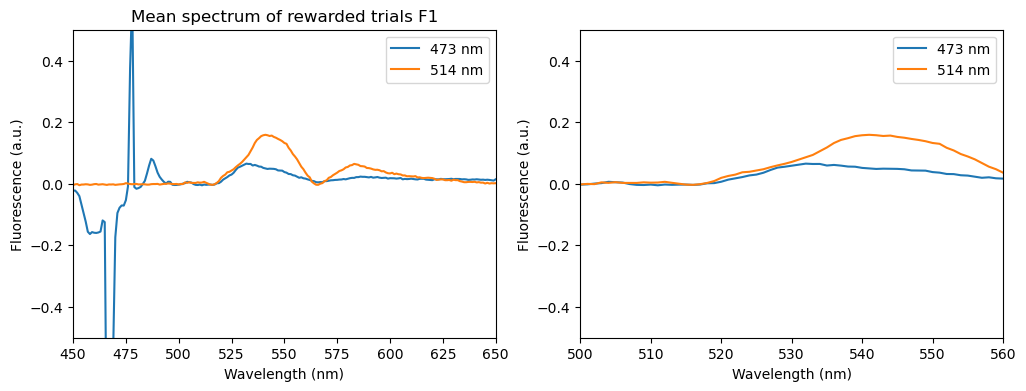

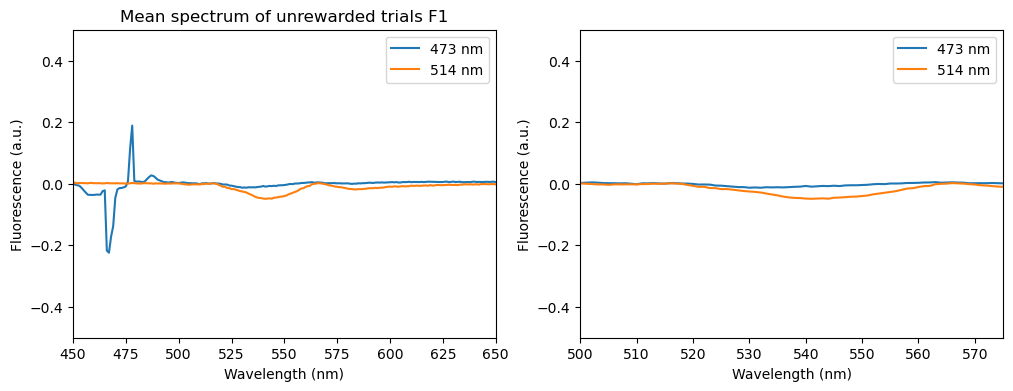

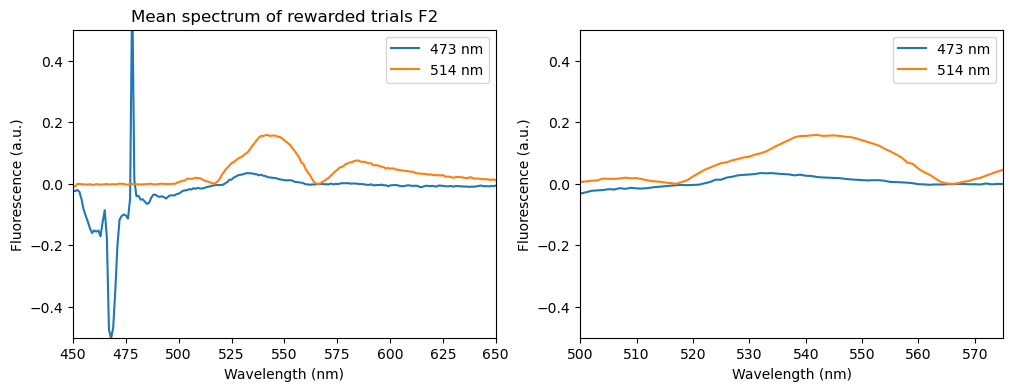

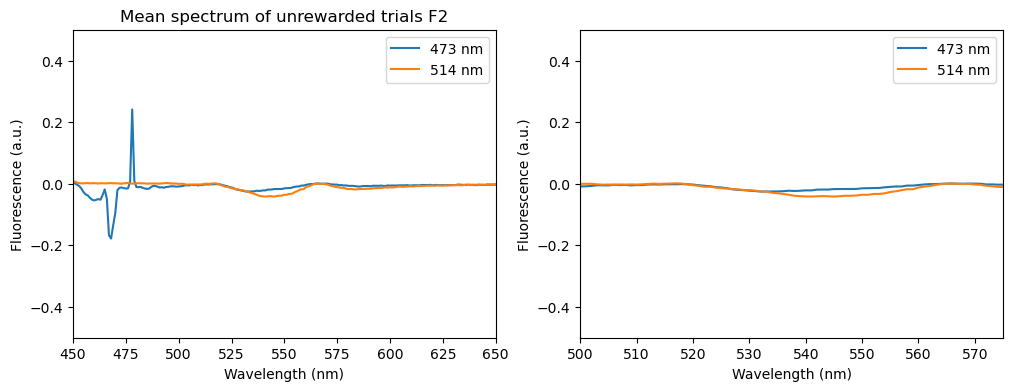

In [28]:
mean_spectrum_473 = np.mean(np.mean(Re_473_F1,axis=0),axis=0)
mean_spectrum_514 = np.mean(np.mean(Re_514_F1,axis=0),axis=0)
# Plot the mean spectrum
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(wavelength,mean_spectrum_473)
plt.plot(wavelength,mean_spectrum_514)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Fluorescence (a.u.)')
plt.title('Mean spectrum of rewarded trials F1')
plt.legend(['473 nm','514 nm'])
plt.xlim([450,650])
plt.ylim([-0.5,0.5])
plt.subplot(1,2,2)
plt.plot(wavelength,mean_spectrum_473)
plt.plot(wavelength,mean_spectrum_514)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Fluorescence (a.u.)')
plt.legend(['473 nm','514 nm'])
plt.xlim([500,560])
plt.ylim([-0.5,0.5])
plt.show()

mean_spectrum_473 = np.mean(np.mean(UnRe_473_F1,axis=0),axis=0)
mean_spectrum_514 = np.mean(np.mean(UnRe_514_F1,axis=0),axis=0)
# Plot the mean spectrum
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(wavelength,mean_spectrum_473)
plt.plot(wavelength,mean_spectrum_514)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Fluorescence (a.u.)')
plt.title('Mean spectrum of unrewarded trials F1')
plt.legend(['473 nm','514 nm'])
plt.xlim([450,650])
plt.ylim([-0.5,0.5])
plt.subplot(1,2,2)
plt.plot(wavelength,mean_spectrum_473)
plt.plot(wavelength,mean_spectrum_514)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Fluorescence (a.u.)')
plt.legend(['473 nm','514 nm'])
plt.xlim([500,575])
plt.ylim([-0.5,0.5])
plt.show()

mean_spectrum_473 = np.mean(np.mean(Re_473_F2,axis=0),axis=0)
mean_spectrum_514 = np.mean(np.mean(Re_514_F2,axis=0),axis=0)
# Plot the mean spectrum
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(wavelength,mean_spectrum_473)
plt.plot(wavelength,mean_spectrum_514)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Fluorescence (a.u.)')
plt.title('Mean spectrum of rewarded trials F2')
plt.legend(['473 nm','514 nm'])
plt.xlim([450,650])
plt.ylim([-0.5,0.5])
plt.subplot(1,2,2)
plt.plot(wavelength,mean_spectrum_473)
plt.plot(wavelength,mean_spectrum_514)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Fluorescence (a.u.)')
plt.legend(['473 nm','514 nm'])
plt.xlim([500,575])
plt.ylim([-0.5,0.5])
plt.show()

mean_spectrum_473 = np.mean(np.mean(UnRe_473_F2,axis=0),axis=0)
mean_spectrum_514 = np.mean(np.mean(UnRe_514_F2,axis=0),axis=0)
# Plot the mean spectrum
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(wavelength,mean_spectrum_473)
plt.plot(wavelength,mean_spectrum_514)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Fluorescence (a.u.)')
plt.title('Mean spectrum of unrewarded trials F2')
plt.legend(['473 nm','514 nm'])
plt.xlim([450,650])
plt.ylim([-0.5,0.5])
plt.subplot(1,2,2)
plt.plot(wavelength,mean_spectrum_473)
plt.plot(wavelength,mean_spectrum_514)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Fluorescence (a.u.)')
plt.legend(['473 nm','514 nm'])
plt.xlim([500,575])
plt.ylim([-0.5,0.5])
plt.show()